In [13]:
#min - max normalizasyonu
import pandas as pd
import numpy as np

dataset=pd.read_csv('data.csv')

def min_max_normalize(data):
    minDeğerler=data.min()
    maxDeğerler=data.max()
    return (data - minDeğerler) / (maxDeğerler-minDeğerler)

numeric_columns=dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_columns]=min_max_normalize(dataset[numeric_columns])

print(dataset.describe())


<bound method NDFrame.describe of      Number of times pregnant  \
0                    0.352941   
1                    0.058824   
2                    0.470588   
3                    0.058824   
4                    0.000000   
..                        ...   
763                  0.588235   
764                  0.117647   
765                  0.294118   
766                  0.058824   
767                  0.058824   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                             0.743719                          
1                                             0.427136                          
2                                             0.919598                          
3                                             0.447236                          
4                                             0.688442                          
..                                                 ...                          
76

In [ ]:
#Burada z-score normalizasyonu yapılmaktadır.

import pandas as pd
import numpy as np


dataset = pd.read_csv('data.csv')

def z_score_normalize(data):
    mean_values = data.mean()
    std_values = data.std()
    return (data - mean_values) / std_values


numeric_columns = dataset.select_dtypes(include=[np.number]).columns


dataset[numeric_columns] = z_score_normalize(dataset[numeric_columns])

print(dataset.describe())


In [ ]:
#Burada medyan normalizasyonu yapılmaktadır.

import pandas as pd
import numpy as np

dataset = pd.read_csv('data.csv')

def median_normalize(data):
    median_values = data.median()
    return (data - median_values)


numeric_columns = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_columns] = median_normalize(dataset[numeric_columns])

print(dataset.describe())

In [ ]:
#Burada sigmoid normalizasyonu yapılmaktadır.

import pandas as pd
import numpy as np


dataset = pd.read_csv('data.csv')


def sigmoid_normalize(data):
    return 1 / (1 + np.exp(-data))

numeric_columns = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_columns] = sigmoid_normalize(dataset[numeric_columns])

print(dataset.describe())


        PC1       PC2  class
0  1.068503  1.234895      1
1 -1.121683 -0.733852      0
2 -0.396477  1.595876      1
3 -1.115781 -1.271241      0
4  2.359334 -2.184819      1


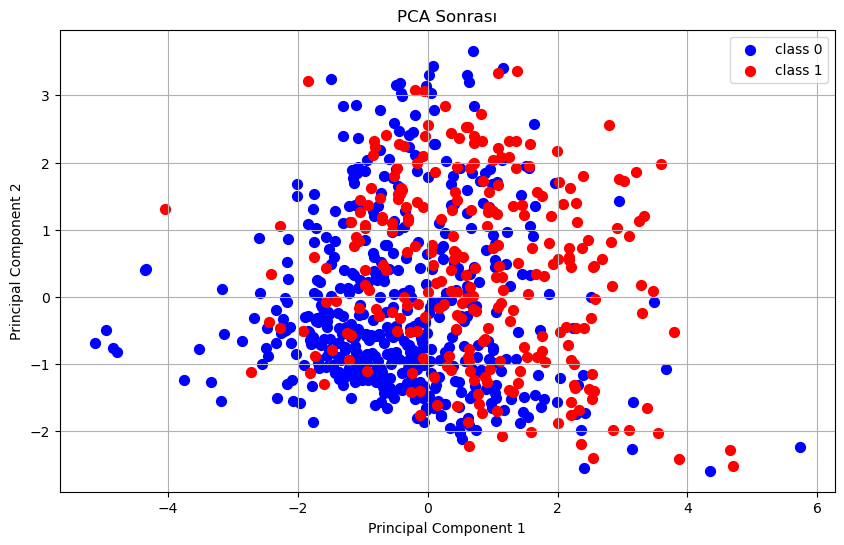

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dataset = pd.read_csv('data.csv')

dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

x = dataset.drop('class', axis=1)
y = dataset['class']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y

print(pca_df.head())

plt.figure(figsize=(10, 6))
targets = [0, 1]
colors = ['b', 'r']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color, s=50, label=f'class {target}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Sonrası')
plt.grid()
plt.show()


        LD1  class
0  1.380247      1
1 -1.564524      0
2  1.766185      1
3 -1.690588      0
4  2.207268      1


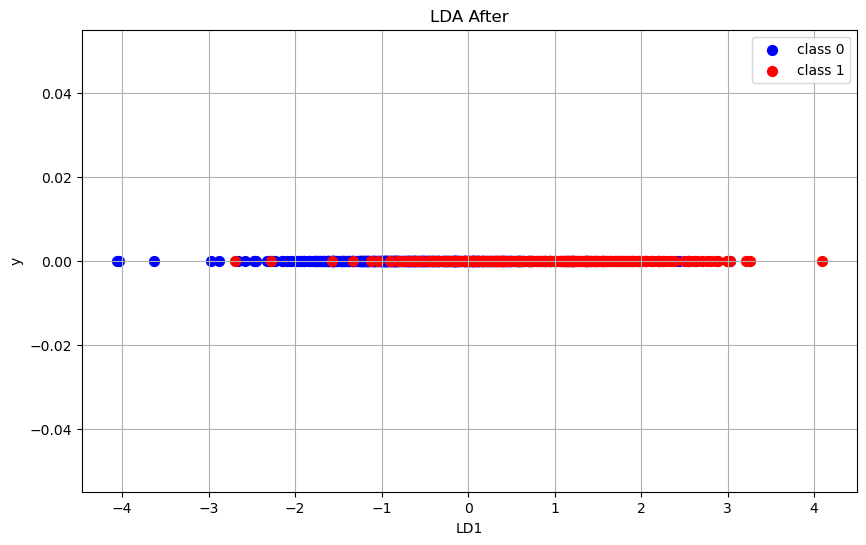

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

dataset = pd.read_csv('data.csv')

dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

x = dataset.drop('class', axis=1)
y = dataset['class']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lda = LinearDiscriminantAnalysis(n_components=1)
x_lda = lda.fit_transform(x_scaled, y)

lda_df = pd.DataFrame(data=x_lda, columns=['LD1'])
lda_df['class'] = y

print(lda_df.head())

plt.figure(figsize=(10, 6))
targets = [0, 1]
colors = ['b', 'r']

for target, color in zip(targets, colors):
    indices_to_keep = lda_df['class'] == target
    plt.scatter(lda_df.loc[indices_to_keep, 'LD1'],
                [0] * len(lda_df.loc[indices_to_keep, 'LD1']),
                c=color, s=50, label=f'class {target}')

plt.xlabel('LD1')
plt.ylabel('y')
plt.legend()
plt.title('LDA After')
plt.grid()
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report

dataset = pd.read_csv('data.csv')

dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']


X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_coefficients = linear_reg.coef_

logistic_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg.fit(X_train, y_train)
logistic_coefficients = logistic_reg.coef_

linear_predictions = linear_reg.predict(X_test)
logistic_predictions = logistic_reg.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_predictions)

print("Çoklu Doğrusal Regresyon Katsayıları:")
print(linear_coefficients)
print("\nÇoklu Lojistik Regresyon Katsayıları:")
print(logistic_coefficients)
print("\n")
print("Çoklu Doğrusal Regresyon MSE (Hata Kareler Ortalaması):", linear_mse)
print("\n")
print("Çoklu Lojistik Regresyon Sınıflandırma Raporu:")
print(classification_report(y_test, logistic_predictions))


Çoklu Doğrusal Regresyon Katsayıları:
[ 0.01696284  0.00577948 -0.00271474 -0.0002271  -0.00012027  0.01393214
  0.10686191  0.00281901]

Çoklu Lojistik Regresyon Katsayıları:
[[ 0.0507822   0.01681333 -0.00784594 -0.00067902 -0.00035011  0.04481324
   0.28091985  0.0085416 ]]


Çoklu Doğrusal Regresyon MSE (Hata Kareler Ortalaması): 0.15201370790095273


Çoklu Lojistik Regresyon Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       150
           1       0.73      0.33      0.46        81

    accuracy                           0.72       231
   macro avg       0.73      0.63      0.64       231
weighted avg       0.72      0.72      0.69       231


Confusion Matrix:
[[140  10]
 [ 54  27]]

Accuracy: 72.2943722943723


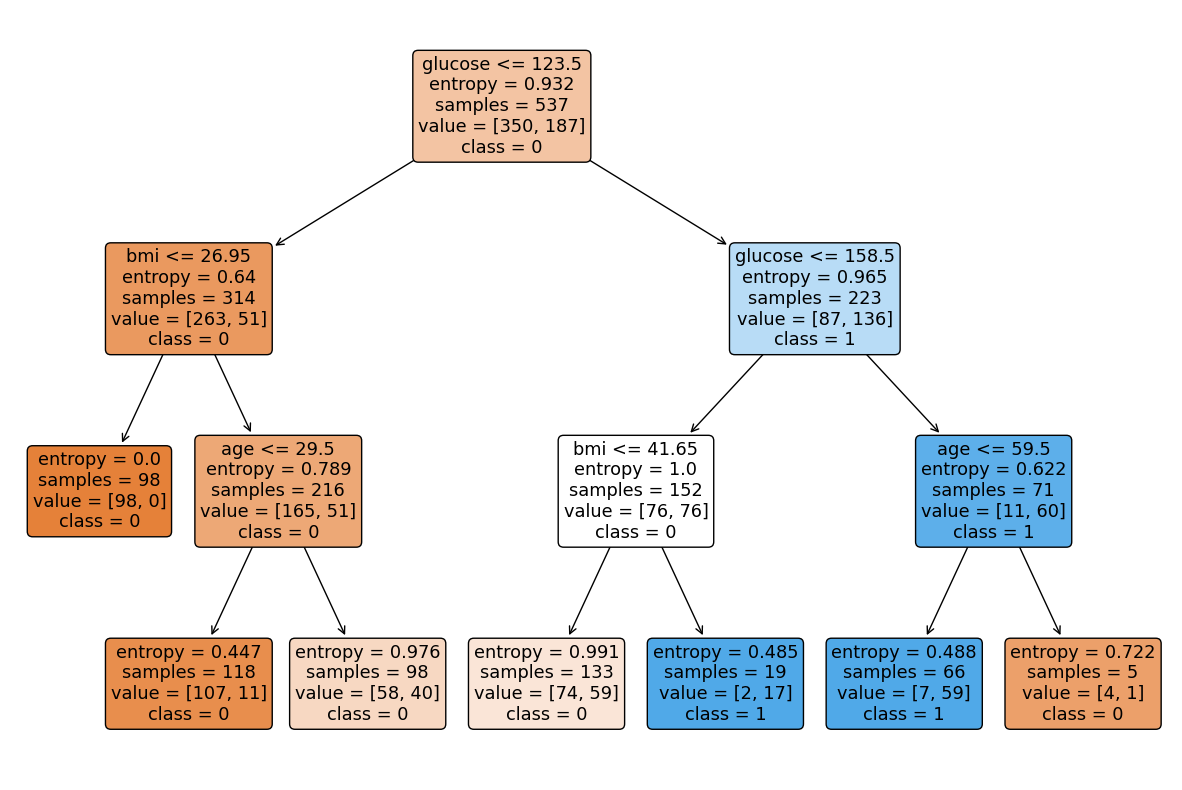

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

dataset = pd.read_csv('data.csv')

dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)

clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred) * 100)

plt.figure(figsize=(15,10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=['0', '1', '2'], filled=True, rounded=True)
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

dataset = pd.read_csv('data.csv')
dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']

X = dataset.drop('class', axis=1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_classification_report = metrics.classification_report(y_train, train_predictions)
test_classification_report = metrics.classification_report(y_test, test_predictions)

confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

print("Eğitim Verisi Sınıflandırma Raporu:")
print(train_classification_report)
print("\nTest Verisi Sınıflandırma Raporu:")
print(test_classification_report)
print("\nTest Verisi Confusion Matrix:")
print(confusion_matrix)


Eğitim Verisi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       349
           1       0.70      0.59      0.64       188

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.73       537
weighted avg       0.76      0.77      0.76       537


Test Verisi Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Test Verisi Confusion Matrix:
[[119  32]
 [ 27  53]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


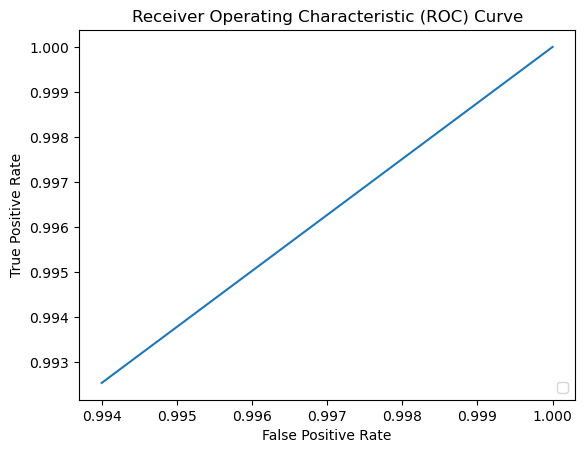

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('data.csv')
dataset.columns = ['pregnant', 'glucose', 'blood pressure', 'skin thickness', 'insulin', 'bmi', 'diabetes pedigree', 'age', 'class']
doc = dataset['class'].values  
test = dataset['glucose'].values  

iterasyon = 0.1
sens = np.zeros(len(np.arange(0, 1, iterasyon)))
spec = np.zeros(len(np.arange(0, 1, iterasyon)))
falspoz = np.zeros(len(np.arange(0, 1, iterasyon)))
art = 0

for i in np.arange(0, 1, iterasyon):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    esik = test >= i
    for k in range(0, len(doc)):               
        if doc[k] == 1 and esik[k] == True:
            TP += 1
        if doc[k] == 0 and esik[k] == False:
            TN += 1
        if doc[k] == 0 and esik[k] == True:
            FP += 1
        if doc[k] == 1 and esik[k] == False:
            FN += 1
    
    sens[art] = TP / (TP + FN)
    spec[art] = TN / (TN + FP)
    falspoz[art] = FP
    art += 1

TPR = sens
FPR = 1 - spec
plt.plot(FPR, TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
